In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

import copy

import matplotlib
from scipy.stats import spearmanr
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

C:\Users\Hiroshi.Hiromax\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
data = pd.read_csv('total_database.csv', parse_dates=[0]).dropna(how='all')
data = data.set_index('Date')

In [20]:
data.head()

,NIKKEI,DOW,NASDAC,EUROPE100,shanghai,VIX,2YR BOND,JPY-USD,WTI
Date,,,,,,,,,
2008-01-06,14110.79004,12606.29981,2439.939941,945.460022,5484.676758,23.68,3.071,108.47,92.31
2008-01-13,13861.29004,12099.29981,2340.020020,892.659973,5180.514160,27.18,2.850,105.90,89.26
2008-01-20,13629.16016,12207.16992,2326.199951,864.130005,4761.687988,29.08,2.789,104.95,86.11
2008-01-27,13497.16016,12743.19043,2413.360107,882.099976,4320.767090,24.02,2.745,105.69,88.46
2008-02-03,13017.24023,12182.12988,2304.850098,838.179993,4599.695801,28.01,2.696,105.89,86.24


In [21]:
features_return = (data / data.shift(1) - 1).dropna(how='all')
features = features_return[:-1]

In [22]:
# 1期シフトする
target_return = (data['NIKKEI'].shift(-1) / data['NIKKEI'] - 1)
target = pd.DataFrame(target_return[1:].dropna())

In [23]:
data_index = features.index[379:]

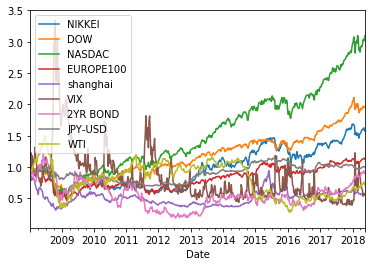

In [24]:
(1+features).cumprod().plot()

In [25]:
features.head()

,NIKKEI,DOW,NASDAC,EUROPE100,shanghai,VIX,2YR BOND,JPY-USD,WTI
Date,,,,,,,,,
2008-01-13,-0.017682,-0.040218,-0.040952,-0.055846,-0.055457,0.147804,-0.071964,-0.023693,-0.033041
2008-01-20,-0.016747,0.008915,-0.005906,-0.031961,-0.080846,0.069904,-0.021404,-0.008971,-0.035290
2008-01-27,-0.009685,0.043910,0.037469,0.020795,-0.092598,-0.174003,-0.015776,0.007051,0.027291
2008-02-03,-0.035557,-0.044028,-0.044962,-0.049790,0.064555,0.166112,-0.017851,0.001892,-0.025096
2008-02-10,0.046501,0.013633,0.007354,0.016417,-0.022299,-0.106748,0.025223,0.004061,0.054267


In [44]:
features_sub1 = features.rename(columns={'NIKKEI':'TOPIX', 'DOW':'SP500', 'NASDAC':'JASDAQ',
                                         'EUROPE100':'STOXX', 'shanghai':'Hong_Kong', 'VIX':'VOL',
                                         '2YR BOND':'10Y BOND', 'JPY-USD':'JPY-EUR', 'WTI': 'GOLD'})

In [48]:
select_col = ['NIKKEI', 'DOW', 'NASDAC', 'EUROPE100', 'shanghai', 'VIX']
features_sub2 = features[select_col].rename(columns={'NIKKEI':'DISHO', 'DOW':'CHICAGO', 'NASDAC':'APPLE',
                                                     'EUROPE100':'GOOGLE', 'shanghai':'Facebook', 'VIX':'AMAZON'})

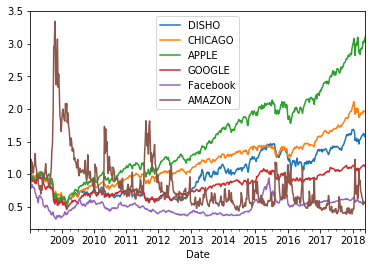

In [49]:
(1+features_sub2).cumprod().plot()

In [53]:
features_sub1.head()

,TOPIX,SP500,JASDAQ,STOXX,Hong_Kong,VOL,10Y BOND,JPY-EUR,GOLD
Date,,,,,,,,,
2008-01-13,-0.017682,-0.040218,-0.040952,-0.055846,-0.055457,0.147804,-0.071964,-0.023693,-0.033041
2008-01-20,-0.016747,0.008915,-0.005906,-0.031961,-0.080846,0.069904,-0.021404,-0.008971,-0.035290
2008-01-27,-0.009685,0.043910,0.037469,0.020795,-0.092598,-0.174003,-0.015776,0.007051,0.027291
2008-02-03,-0.035557,-0.044028,-0.044962,-0.049790,0.064555,0.166112,-0.017851,0.001892,-0.025096
2008-02-10,0.046501,0.013633,0.007354,0.016417,-0.022299,-0.106748,0.025223,0.004061,0.054267


In [57]:
features_test = pd.concat([features, features_sub1, features_sub2], axis=1)

In [58]:
features_test.head()

,NIKKEI,DOW,NASDAC,EUROPE100,shanghai,VIX,2YR BOND,JPY-USD,WTI,TOPIX,...,VOL,10Y BOND,JPY-EUR,GOLD,DISHO,CHICAGO,APPLE,GOOGLE,Facebook,AMAZON
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-13,-0.017682,-0.040218,-0.040952,-0.055846,-0.055457,0.147804,-0.071964,-0.023693,-0.033041,-0.017682,...,0.147804,-0.071964,-0.023693,-0.033041,-0.017682,-0.040218,-0.040952,-0.055846,-0.055457,0.147804
2008-01-20,-0.016747,0.008915,-0.005906,-0.031961,-0.080846,0.069904,-0.021404,-0.008971,-0.035290,-0.016747,...,0.069904,-0.021404,-0.008971,-0.035290,-0.016747,0.008915,-0.005906,-0.031961,-0.080846,0.069904
2008-01-27,-0.009685,0.043910,0.037469,0.020795,-0.092598,-0.174003,-0.015776,0.007051,0.027291,-0.009685,...,-0.174003,-0.015776,0.007051,0.027291,-0.009685,0.043910,0.037469,0.020795,-0.092598,-0.174003
2008-02-03,-0.035557,-0.044028,-0.044962,-0.049790,0.064555,0.166112,-0.017851,0.001892,-0.025096,-0.035557,...,0.166112,-0.017851,0.001892,-0.025096,-0.035557,-0.044028,-0.044962,-0.049790,0.064555,0.166112
2008-02-10,0.046501,0.013633,0.007354,0.016417,-0.022299,-0.106748,0.025223,0.004061,0.054267,0.046501,...,-0.106748,0.025223,0.004061,0.054267,0.046501,0.013633,0.007354,0.016417,-0.022299,-0.106748


In [28]:
type(features.index[0])

pandas._libs.tslib.Timestamp

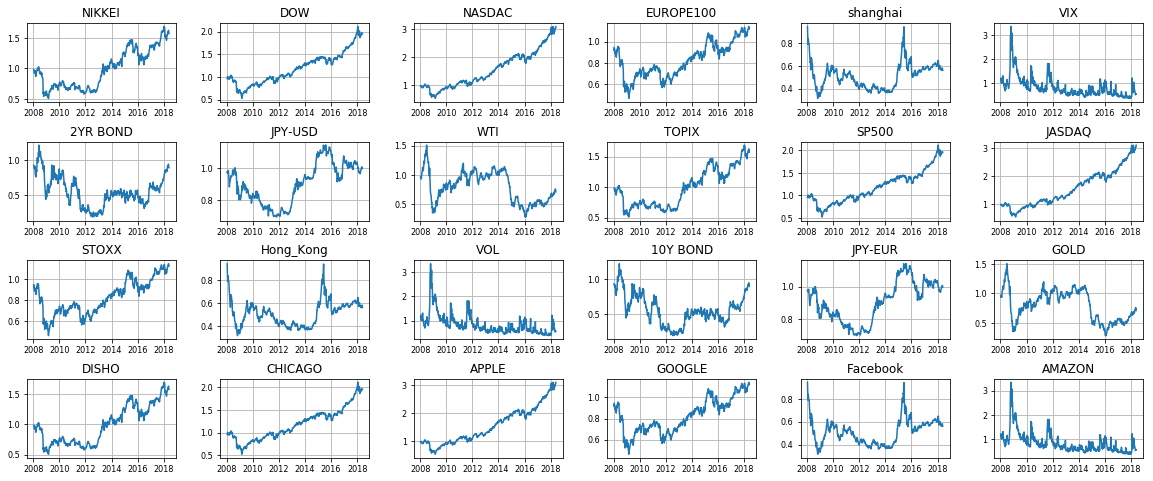

In [71]:
x = features_test
plt.figure(figsize=(20,8))
plt.subplots_adjust(wspace=0.3,hspace=0.5)

for i in range(len(x.columns)):
    plt.subplot(4,6,i+1)
    plt.plot(x.index, (1+x[x.columns[i]]).cumprod())
    plt.title(x.columns[i])#, fontsize=10)
    plt.tick_params(labelsize=8)
    plt.grid(True)

plt.savefig('equity_curves.png')
plt.show()

In [73]:
# networkx の import
import networkx as nx

# グラフの構築
G = nx.karate_club_graph()

#ノード数とエッジ数を出力
nx.number_of_nodes(G)
nx.number_of_edges(G)

78

In [137]:
edge_list = G.edges(data=False)

In [140]:
len(edge_list)

53

In [139]:
for i in range(0, 50, 2):
    del edge_list[i]

In [173]:
Graph = nx.DiGraph()

In [174]:
Graph.add_edges_from(edge_list)

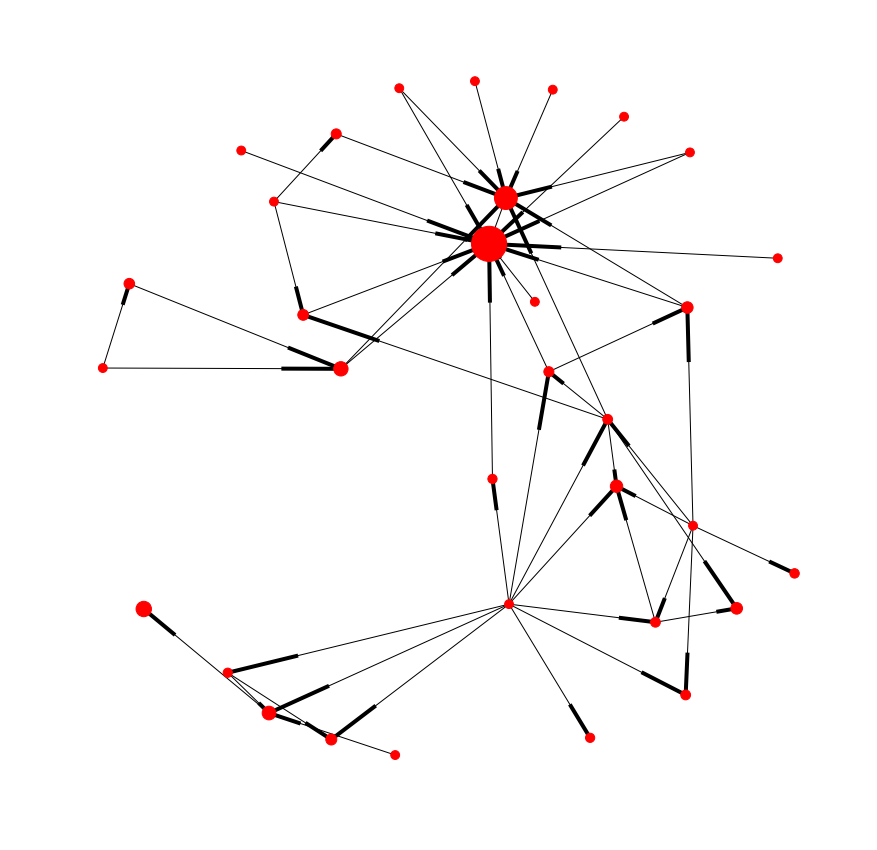

In [175]:
# pagerank の計算
pr = nx.pagerank(Graph)

# 可視化
plt.figure(figsize=(15, 15))
nx.draw_networkx_edges(Graph, pos , arrowstyle='->',arrowsize=1000, edge_cmap=plt.cm.Blues, width=1)
nx.draw_networkx_nodes(Graph, pos, node_size=[5000*v for v in pr.values()])

plt.axis('off')
plt.show()

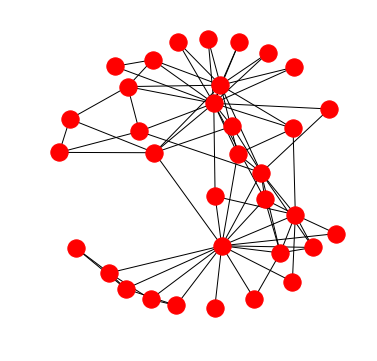

In [75]:
# networkx, matplotlib の import
import networkx as nx
import matplotlib.pyplot as plt

# グラフの構築
G = nx.karate_club_graph()

# レイアウトの取得
pos = nx.spring_layout(G)

# 可視化
plt.figure(figsize=(6, 6))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos)
plt.axis('off')
plt.show()

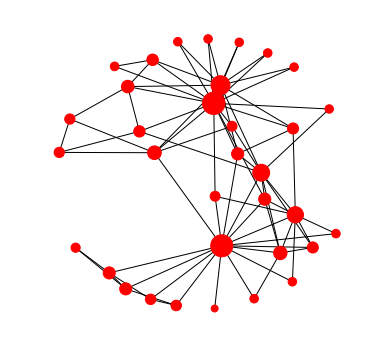

In [164]:
# pagerank の計算
pr = nx.pagerank(G)

# 可視化
plt.figure(figsize=(6, 6))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_size=[5000*v for v in pr.values()])

plt.axis('off')
plt.savefig('pagerank.png')
plt.show()

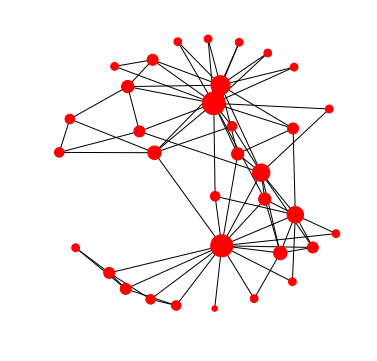

In [79]:
# 次数中心性
dg = nx.degree_centrality(G)

# 可視化
plt.figure(figsize=(6, 6))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_size=[1000*v for v in dg.values()])
plt.axis('off')
plt.show()

In [176]:
!pip install graphviz

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [180]:
from graphviz import Digraph
G = Digraph(format='png')
G.attr('node', shape='circle')

N = 15    # ノード数

# ノードの追加
for i in range(N):
    G.node(str(i), str(i))

# 辺の追加
for i in range(N):
    if (i - 1) // 2 >= 0:
        G.edge(str((i - 1) // 2), str(i))

# print()するとdot形式で出力される
print(G)

digraph {
	node [shape=circle]
	0 [label=0]
	1 [label=1]
	2 [label=2]
	3 [label=3]
	4 [label=4]
	5 [label=5]
	6 [label=6]
	7 [label=7]
	8 [label=8]
	9 [label=9]
	10 [label=10]
	11 [label=11]
	12 [label=12]
	13 [label=13]
	14 [label=14]
	0 -> 1
	0 -> 2
	1 -> 3
	1 -> 4
	2 -> 5
	2 -> 6
	3 -> 7
	3 -> 8
	4 -> 9
	4 -> 10
	5 -> 11
	5 -> 12
	6 -> 13
	6 -> 14
}


In [181]:
G.render('binary_tree')

ExecutableNotFound: failed to execute ['dot', '-Tpng', '-O', 'binary_tree'], make sure the Graphviz executables are on your systems' PATH